# Supervised learning

Supervised learning aims to predict labels of data using annotated examples. Supervised algorithms learn patterns on "tagged" data for later predicting the outcome of data which the model has not seen before. 

There are two branches in supervised learning:


*   **Classification:** learns and predicts discrete labels on the data (e.g. Diabetic/Healthy, Dead cell/Live cell...)  
*   **Regression:** predicts a continuous value based on the a set of explanatory variables (e.g. weight based on the height or age based on methylation pattern).

Two important concepts in supervised learning are **response variable** and the **predictive variables**. Supervised models aim to predict the response variable using the values from the predictor variables.



Let's look at examples:

The iris dataset contains information about 3 species of plants.

In [2]:
# import packages
import numpy as np
import pandas as pd
from sklearn import datasets

# load dataset
iris_dataset = datasets.load_iris()

# create data frame with predictive and variables
iris_table = pd.DataFrame(data = iris_dataset['data'], 
                          columns = iris_dataset['feature_names'])

# add response variable to the table
iris_table['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)

# show first five rows of the dataframe
iris_table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Another example is the diabetes dataset.

In [3]:
# load dataset
diabetes_dataset = datasets.load_diabetes()

# create data frame with predictive variables
diabetes_table = pd.DataFrame(data = diabetes_dataset['data'],
                              columns = diabetes_dataset['feature_names'])

# add response variable to the table
diabetes_table['disease_progression'] = pd.Series(data = diabetes_dataset['target'])

# show first five rows of the dataframe
diabetes_table.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# Regression

Regression algorithms learn the relationship between the predictor and the response variable. The output is a numeric value. 



## Simple linear regression

Simple linear regression tries to find the linear relationship between one predictor variable and the response variable. In other words it tries to find the line which best fits the training data. It follows the formula:

<br>

 $$ 
  \hat y = \beta_0 + \beta_1  x 
 $$

<br>

* $\hat y = $ predicted value
* $x$ = predictor variable
* $\beta_1$ = model coefficient (slope of the line in simple linear regression)
* $\beta_0$ = bias term (intercept in simple linear regression)

Let's see a simple example with the iris dataset:



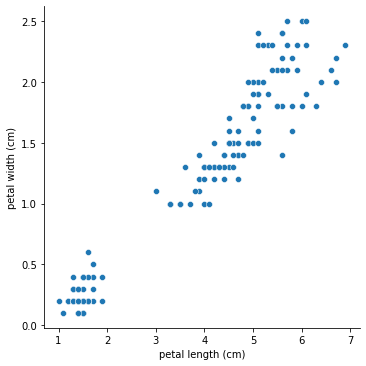

In [4]:
import seaborn as sns
%matplotlib inline

# plot the petal width v.s. the petal length
sns.relplot(data = iris_table,
            x = iris_table.columns[2], y = iris_table.columns[3])

<br>

Fit a linear regression model to the data.

In [5]:
from sklearn import linear_model

# create a linear regression object
regres_iris = linear_model.LinearRegression()

# create new arrays for the predictive and response variables
pet_wid = iris_dataset['data'][:, np.newaxis, 3]
pet_len = iris_dataset['data'][:, np.newaxis, 2]

# fit linear regression model to the data
regres_iris.fit(pet_len, pet_wid)

# extract slope 
m = float(regres_iris.coef_)

# extract intercept
n = float(regres_iris.intercept_)

print('slope = {} and intercept = {}'.format(m, n))

slope = 0.41575541635241153 and intercept = -0.3630755213190291


<br>
Plot fitted line

Text(0, 0.5, 'petal width (cm)')

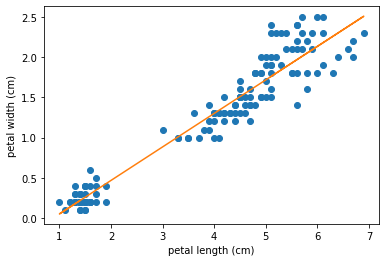

In [6]:
import matplotlib.pyplot as plt
plt.plot(iris_dataset['data'][:,2], iris_dataset['data'][:,3], 'o')
plt.plot(iris_dataset['data'][:,2], m*iris_dataset['data'][:,2] + n)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

<br>

The linear model follows the equation shown above:

<br>

 $$ 
  \hat y = \beta_0 + \beta_1  x 
 $$

<br>

* $ \beta_1 $ = 0.42
* $ \beta_0 $ = -0.36

<br>

$$ \hat y = 0.42 -0.36 x $$

<br>

How are $ \beta_0 $ and $ \beta_1 $ estimated? In other words how is the line which fits the data best found?

In regression algorithms the aim is to find the model which minimises the loss function. Choosing the apropriate loss function is key in machine learning. In the case of simple linear regression the aim is to find the line which minimises the difference between the predicted values and the true values. 

Let's look at it in this image: 

<br>

![image.png](https://littleml.files.wordpress.com/2019/03/residuals-1.png))

<br>

The difference between the predicted value and the true value is called residual (doted lines). To account for the fact that predictions can be higher and lower than the true value (this is residuals can be positive or negative), a linear model aims to minimise the Residual Sum of Squares (RSS):

<br>

$$ RSS(\beta) = \sum_{i=1}^{N} (\hat y - y)^2 $$

<br>

* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value

<br>


For linear regression models, there is a closed-formed solution to compute the best coefficient values using the [Normal equation](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

<br>

If our model is unbiased we would expect the residuals to distribute randomly as seen in the plot below:





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


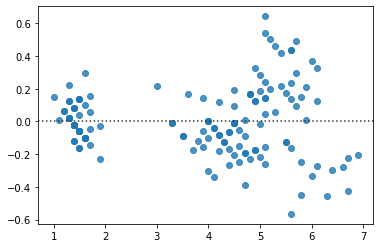

In [7]:
# create a residuals plot
sns.residplot(iris_dataset['data'][:,2],iris_dataset['data'][:,3])

## Evaluate the model

There are different metrics to evaluate the performance of linear regression models.

### Mean Absolute Error (MAE)

The **Mean absolute error** is perhaps the simplest metric. It computes the average absolute difference between predictions and actual values. It therefore follows the formula:

$$ MAE(\beta) = {\frac{1}{N}}\sum_{i=1}^{N} |\hat y - y| $$ 

* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value


<br>


In the case of MAE all residuals are weighted equally. For this reason it is not optimal when outliers are present.

The interpretation of this metric relatively straight forward. It indicates the average error of the model (regardless of direction). For example, if a linear regression model which predicts the height (cm) based on the weight (kg) has MAE = 3, it indicates that the model predictions have an average of error ±3 cm.



<br>

### Root Mean Square Error (RMSE)

The **Root mean square error**  is another common metric to evaluate the performance of machine learning algorithms. It follows the formula:

<br>

$$ RMSE(\beta) =  \sqrt {\frac{1}{N}\sum_{i=1}^{N}(\hat y - y)^2} $$


* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value

<br>

Since the differences between predicted and true values are squared, the importance of errors increases quadratically on their value. This means that predictions which are very far from the true values are penalised by RMSE. 

### Coeficient of determination ($ R^2$)

There are other metrics which evaluate how good the model fits data. The coefficient of determination or R-squared ($R^2$) is one example. It measures the proportion of total variance of the response variable explained by model. The higher the value the better the model fits the data. It follows the equation:

<br>

$$ R^2 = 1 - \frac {SS_{res}}{SS_{tot}} = 1 - \frac {\sum_{i=1}^{N} (\hat y - y)^2}{\sum_{i=1}^{N}(y - \bar y)^2} $$

* $ \hat y = $ predicted value
* $ y = $ true value
* $ \bar y =  $ mean of response variable
* $ N = $ number of data points

<br>

## Build linear model

Let's now fit a simple linear model to the iris dataset and make predictions. In this case we are interested in predicting the petal width (response variable) using the petal length as predictor variable.


The process has the following steps:

1. Split dataset into training and test set
2. Fit linear model to the training data
3. Apply the model to test set.
4. Evaluate the model performance (MAE, RMSE and $R^2$)

In [25]:
# split dataset into training and test set

# set a random seed so that the randomly sampled rows are always the same
import random
random.seed(20)

# sample 20 row numbers to use as test set
rows_test = random.sample(range(0,pet_len.shape[0]),20)

# get the remaining row numbers as training set
rows_train = np.setxor1d(rows_test, list(range(0, pet_len.shape[0])))

# split predictor variable into test and training set
pet_len_train = np.delete(pet_len, rows_test)[:,np.newaxis]
pet_len_test = np.delete(pet_len, rows_train)[:,np.newaxis]

# split response variable into test and training set
pet_wid_train = np.delete(pet_wid, rows_test)[:, np.newaxis]
pet_wid_test = np.delete(pet_wid, rows_train)[:,np.newaxis]

print("Training set has {} observations and test set has {}".format(pet_len_train.shape[0], pet_len_test.shape[0]))



Training set has 130 observations and test set has 20


Text(0, 0.5, 'petal width (cm)')

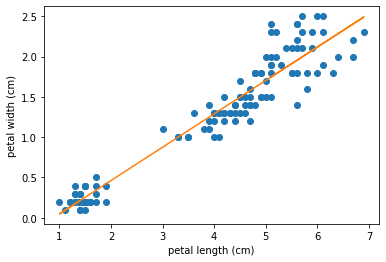

In [26]:
# fit a line to the training set

# create a linear regression object
regres_pet = linear_model.LinearRegression()

# fit a linear model to the training data
regres_pet.fit(pet_len_train, pet_wid_train)

# plot the length v.s. width the the fitted line
plt.plot(pet_len_train , pet_wid_train, 'o')
plt.plot(pet_len_train, regres_pet.predict(pet_len_train))
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [27]:
# make predictions on the test set
pet_wid_pred = regres_pet.predict(pet_len_test)

# create data frame with predicted and true values
pred_table_wid = pd.DataFrame.from_dict({'Predicted_width': pet_wid_pred.flatten(), 'True_width': pet_wid_test.flatten()})

# print data frame 
pred_table_wid

,Predicted_width,True_width
0,0.213548,0.3
1,0.254940,0.3
2,0.296332,0.2
3,0.296332,0.4
4,0.254940,0.1
5,0.172156,0.2
6,0.296332,0.6
7,1.496697,1.5
8,1.289738,1.3
9,1.496697,1.5


Text(0, 0.5, 'Predicted width')

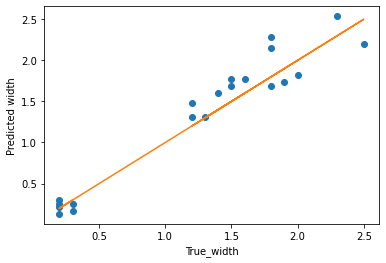

In [16]:
# Make scatter plot of predicted vs true sepal width
plt.plot(pet_wid_test, pet_wid_pred, 'o')
plt.plot(pet_wid_test, pet_wid_test)
plt.xlabel('True_width')
plt.ylabel('Predicted width')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


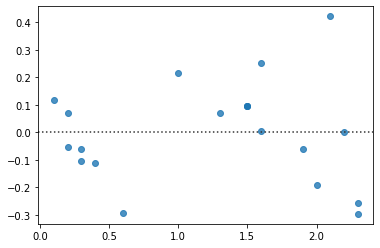

In [32]:
# make residuals plot
sns.residplot(pet_wid_test, pet_wid_pred)

In [18]:
# evaluate the performance of the model

# import metrics package
from sklearn import metrics

# compute MAE
petal_mae = metrics.mean_absolute_error(pet_wid_pred, pet_wid_test)

# get RMSE
petal_rmse = metrics.mean_squared_error(pet_wid_pred, pet_wid_test,
                           squared = False)

print("The model has a MAE = {} and a RMSE = {}".format(petal_mae, petal_rmse))


The model has a MAE = 0.17479908325052987 and a RMSE = 0.21116253172465146


In [19]:
# get squared R 
metrics.r2_score(pet_wid_pred, pet_wid_test)

0.9277753591881827

## Exercise 

Let's now do an exercise. The iris dataset contains two additional variables sepal length and sepal width. How well can we predict the length of sepals using the length of petals? 

1. Fit a linear model to predict sepal length uisng the petal length 
2. Predict the sepal length of a test set using the model
3. Compute the MAE, RMSE and $R^2$.


In [ ]:
# the column we are interested now are 0 and 2
iris_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


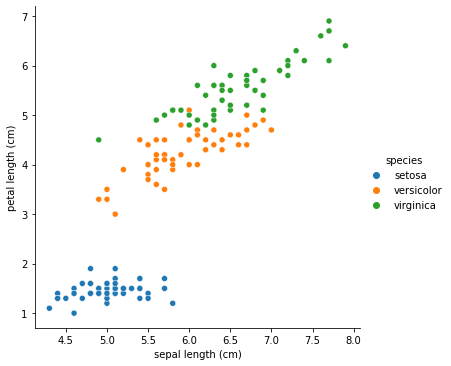

In [33]:
# the relationship seems different for the setosa species
sns.relplot(data = iris_table, x = iris_table.columns[0], y = iris_table.columns[2], hue="species")

In [34]:
# exclude setosa species for the downstream analysis

# get sepal length for versicolor and virginica species
sep_len = iris_table[iris_table.species != "setosa"].iloc[:, 0][:, np.newaxis]

# get petal length for versicolor and virginica species
pet_len_filt = iris_table[iris_table.species != "setosa"].iloc[:,2][:, np.newaxis]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


### Solution

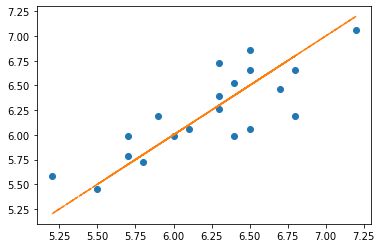

In [35]:
random.seed(10)

# sample 5 row numbers to use as test set
rows_test = random.sample(range(0, sep_len.shape[0]),20)

# get the remaining row numbers as training set
rows_train = np.setxor1d(rows_test, list(range(0, sep_len.shape[0])))

# split predictor variable into test and training set
sep_len_train = np.delete(sep_len, rows_test)[:,np.newaxis]
sep_len_test = np.delete(sep_len, rows_train)[:,np.newaxis]

# split response variable into test and training set 
pet_len_train = np.delete(pet_len_filt, rows_test)[:, np.newaxis]
pet_len_test = np.delete(pet_len_filt, rows_train)[:, np.newaxis]

# create a linear regression object
regres_sep = linear_model.LinearRegression()

# fit a linear model to the training data
regres_sep.fit(pet_len_train, sep_len_train)

# predict values of test set
sep_len_pred = regres_sep.predict(pet_len_test)

# plot predicted values v.s. true values
plt.plot(sep_len_test, sep_len_pred, 'o')
plt.plot(sep_len_test, sep_len_test, "-.")



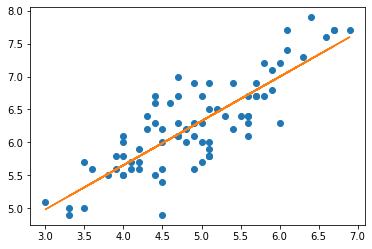

In [36]:
# plot fitted line to train data
plt.plot(pet_len_train, sep_len_train, 'o')
plt.plot(pet_len_train, regres_sep.predict(pet_len_train))

In [37]:
# get MAE 
metrics.mean_absolute_error(sep_len_test, sep_len_pred)

0.2212355038642344

In [38]:
# get RMSE 
metrics.mean_squared_error(sep_len_test, sep_len_pred, squared = False)

0.2769630990972822

In [39]:
# get squared R
metrics.r2_score(sep_len_test, sep_len_pred)

0.6680720109841154

## Multiple linear regression

In many cases we have more than one predictor variable describing the response variable. The same linear regression model can be applied in such cases. In that case there is one additional parameter per additional predictor variable. With these multidimensional data instead of finding the line which best fits the data, the plane (2 predictor variables) or hyperplane (more than 2 predictor variables) is sought.

<br>

$$ \hat y = \beta_0 + \beta_1x_{1} + \beta_2x_{2} ... \beta_nx_{n} $$ 

<br>

* $\hat y $ = predicted value 
* $ \beta_i $ = parameters or coefficients of the model
* $ x_{i} $ = predictor variable  

<br> 

Let's fit a multiple linear regression model to the diabetes dataset. The response variable in this case is termed disase progression.


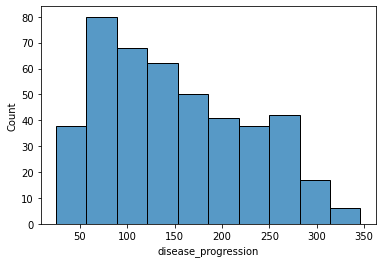

In [ ]:
# make histogram of disease progression values
sns.histplot(data = diabetes_table, x = 'disease_progression')

In [41]:
from sklearn.model_selection import train_test_split

# split dataset into test and training set
# scikit learn includes a function to do so
# we use 80% of the data for training and 20 % as test set
diab_train, diab_test, progr_train, progr_test = train_test_split(diabetes_dataset['data'], diabetes_dataset['target'],
                                                                  test_size = 0.2, random_state = 42)

# create a linear regression object
diab_lin_model = linear_model.LinearRegression()

# fit the linear model to the training data
diab_lin_model = diab_lin_model.fit(diab_train, progr_train)

# predict values of test set
diab_pred = diab_lin_model.predict(diab_test)

# make data frame with predicted and true values
pred_table_diab = pd.DataFrame.from_dict({'Predicted_progression': diab_pred.flatten(), 'True_progression': progr_test.flatten()})

# print data frame 
pred_table_diab



,Predicted_progression,True_progression
0,139.548313,219.0
1,179.520306,70.0
2,134.041333,202.0
3,291.411936,230.0
4,123.787237,111.0
...,...,...
84,115.009746,153.0
85,78.958867,98.0
86,81.557314,37.0
87,54.377478,63.0


Text(0, 0.5, 'Predicted progression(a.u.)')

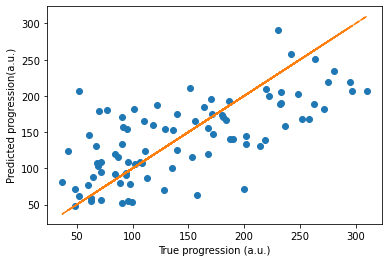

In [43]:
# plot predicted values vs real values
plt.plot(progr_test, diab_pred, 'o')
plt.plot(progr_test, progr_test, "--")
plt.xlabel("True progression (a.u.)")
plt.ylabel("Predicted progression(a.u.)")

In [45]:
# get MAE
diab_mae = metrics.mean_absolute_error(progr_test, diab_pred)

print('The MAE of the model is {}'.format(diab_mae))

The MAE of the model is 42.79389304196525


In [46]:
# get RMSE
diab_rmse = metrics.mean_squared_error(progr_test, diab_pred,
                                       squared = False)

print('The RMSE of the model is {}'.format(diab_rmse))

The RMSE of the model is 53.8532569849144


In [47]:
# get squared R 
diab_rsqr = metrics.r2_score(progr_test, diab_pred)

print('The R^2 of the model is {}'.format(diab_rsqr))

The R^2 of the model is 0.452606602161738


## Polynomial regression

There are occasions in which the relationship between the dependent and independent variables is not linear. In such cases a linear regression model would not fit the data well. 

Let's see an example:

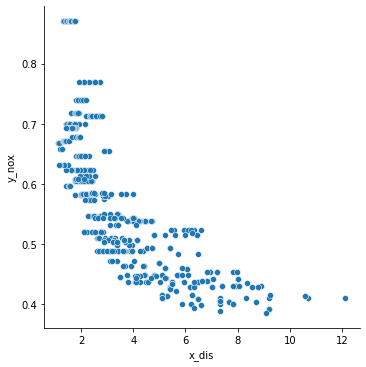

In [48]:
# load boston dataset
boston_dataset = datasets.load_boston()

# get dependent and independent variables as arrays
y_nox = boston_dataset['data'][:, np.newaxis ,4]
x_dis = boston_dataset['data'][:, np.newaxis ,7]

# make dataframe with dependent and independent variable
boston_table = pd.DataFrame.from_dict({'y_nox': y_nox.flatten(),
                                       'x_dis': x_dis.flatten()})

# make scatter plot
sns.relplot(data = boston_table, x = boston_table.columns[1], y = boston_table.columns[0])

In [49]:
bost_lin_model = linear_model.LinearRegression().fit(x_dis, y_nox)

# compute squared R
rsqr_bos_lin = metrics.r2_score(y_nox, bost_lin_model.predict(x_dis))

print('The R^2 of the model is {}'.format(rsqr_bos_lin))

The R^2 of the model is 0.5917149670934201


In [50]:
# get RMSE
rmse_bos_lin = metrics.mean_squared_error(y_nox, bost_lin_model.predict(x_dis),
                                         squared = False)

print('The RMSE of the model is {}'.format(rmse_bos_lin))

The RMSE of the model is 0.07396937272094305


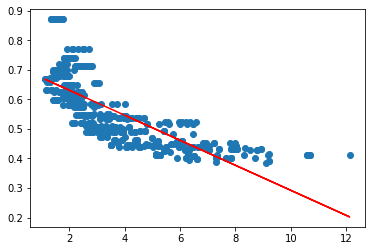

In [51]:
# make scatter plot with fitted line
plt.plot(x_dis, y_nox, 'o')
plt.plot(x_dis, bost_lin_model.predict(x_dis), 'r')



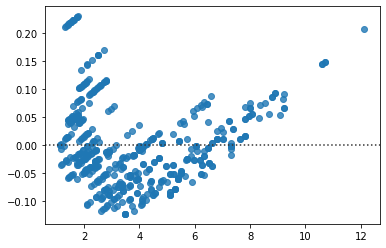

In [52]:
# make residuals plot
sns.residplot(x = x_dis.flatten(), y = y_nox.flatten())

The following steps are done when carrying out polynomial regression:

1. Generate polynomial features from original features.
2. Fit a linear regression model to the extended feature set.
3. Evalute the fit of the model

<br>

In [53]:
from sklearn.preprocessing import PolynomialFeatures

# generate new features (second degree polynomial)
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_dis_poly = poly_features.fit_transform(x_dis)

x_dis_poly[0]


array([ 4.09  , 16.7281])

In [54]:
# fit linear model to extended data
bost_poly_model = linear_model.LinearRegression().fit(x_dis_poly, y_nox)

# compute squared R
rsqr_bos_poly = metrics.r2_score(y_nox, bost_poly_model.predict(x_dis_poly))

print('The R^2 of the model is {}'.format(rsqr_bos_poly))

The R^2 of the model is 0.6998562064647851


In [55]:
# get RMSE
rmse_bos_poly = metrics.mean_squared_error(y_nox, bost_poly_model.predict(x_dis_poly),
                                         squared = False)

print('The RMSE of the model is {}'.format(rmse_bos_poly))

The RMSE of the model is 0.06342126345299987


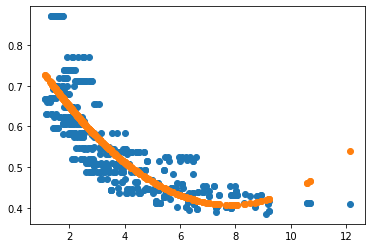

In [56]:
# make scatter plot with predicted and real values
plt.plot(x_dis, y_nox, 'o')
plt.plot(x_dis, bost_poly_model.predict(x_dis_poly), 'o')

In [57]:
# get coefficients from the model 
bost_poly_model.coef_

array([[-0.1116276 ,  0.00713503]])

Since we used a polynomial of degree 2, out model follows the equation:

<br>

$$ \hat y = \beta_0 + \beta_1x_1 + \beta_2x_1^2  $$


## Final exercise
To end this section let's explore the relationship between methylation and age. In the dataset below we can find the methylation levels for 53 CpGs from 100 individuals as well as the corresponding age. The dataset was obtained from [Daunay et al., 2019](https://www.nature.com/articles/s41598-019-45197-w#Sec14). Methylation levels were measured from blood samples using pyrosequencing. 

Can we predict the age of the individuals based on the methylation levels using linear regression? How accurate are our predictions? 

In [59]:
# load dataset 
age_table = pd.read_csv("methylation_data.csv")


In [60]:
# transform it into an array
meth_array = age_table.to_numpy()


### Solution

In [61]:
# split dataset into test and training set
meth_train, meth_test, age_train, age_test = train_test_split(meth_array[:,1:99], meth_array[:, 0],
                                                              test_size = 0.2, random_state = 42)

# create a linear regression object
age_lin_model = linear_model.LinearRegression()

# fit the linear model to the training data
age_lin_model = age_lin_model.fit(meth_train, age_train)

# predict values of test set
age_pred = age_lin_model.predict(meth_test)

# make data frame with predicted and true values
pred_table_age = pd.DataFrame.from_dict({'Predicted_age': age_pred.flatten(), 'Chronological_age': age_test.flatten()})

# print data frame 
pred_table_age

,Predicted_age,Chronological_age
0,26.915782,25.0
1,60.171115,58.0
2,32.576195,45.0
3,51.050426,49.0
4,60.883792,48.0
5,50.781928,39.0
6,68.048044,59.0
7,20.685636,21.0
8,35.731515,36.0
9,11.605644,19.0


Text(0, 0.5, 'Predicted age (years)')

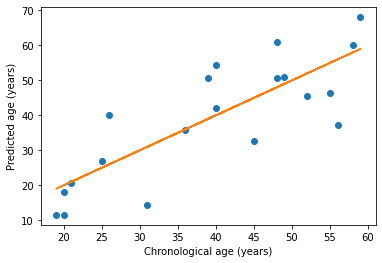

In [62]:
# plot predicted age v.s. chronological age 
plt.plot(age_test ,age_pred, 'o')
plt.plot(age_test, age_test)
plt.xlabel("Chronological age (years)")
plt.ylabel("Predicted age (years)")

In [63]:
# compute MAE 
age_mae = metrics.mean_absolute_error(age_test, age_pred)

# compute RMSE 
age_rmse = metrics.mean_absolute_error(age_test, age_pred)

# compute squared R
age_sqrtr = metrics.r2_score(age_test, age_pred)

In [ ]:
print("The model predicts age with accuracy ±{} years".format(round(age_mae, 2)))

The model predicts age with accuracy ±7.72 years



# Classification

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.



![image.png](https://d33wubrfki0l68.cloudfront.net/cb281b80c41c9e76eb327e26ed5e0e6e5f05fc7f/31de9/static/b42ef5448b11ec2f2ec20ca7f97cbb3c/9cda9/decision-tree-sports.png)
https://monkeylearn.com/blog/classification-algorithms/

Random Forest

The random forest algorithm is an expansion of decision tree, in that, you first construct some-axis real-world decision trees with training data, then fit your new data within one of the trees as a “random forest.” 

It, essentially, averages your data to connect it to the nearest tree on the data scale. Random forest models are helpful as they remedy for the decision tree’s problem of “forcing” data points within a category unnecessarily. 

In [ ]:
# Example
#https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/

# Load libs
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)


# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [ ]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

**Preprocess Data**


In [ ]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Huzzah! We have done it! We have officially trained our random forest Classifier! Now let’s play with it. The Classifier model itself is stored in the clf variable.

**Apply Classifier To Test Data**


In [ ]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

What are you looking at above? Remember that we coded each of the three species of plant as 0, 1, or 2. What the list of numbers above is showing you is what species our model predicts each plant is based on the the sepal length, sepal width, petal length, and petal width. How confident is the classifier about each plant? We can see that too.



In [ ]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

There are three species of plant, thus [ 1. , 0. , 0. ] tells us that the classifier is certain that the plant is the first class. Taking another example, [ 0.9, 0.1, 0. ] tells us that the classifier gives a 90% probability the plant belongs to the first class and a 10% probability the plant belongs to the second class. Because 90 is greater than 10, the classifier predicts the plant is the first class.



Support Vector Machines

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction. 

For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.

**Evaluate Classifier**

Now that we have predicted the species of all plants in the test data, we can compare our predicted species with the that plant’s actual species.

In [ ]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]

# View the PREDICTED species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [ ]:
# View the ACTUAL species for the first five observations
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

That looks pretty good! At least for the first five observations. Now let’s use look at all the data.

**Create a confusion matrix**

A confusion matrix can be, no pun intended, a little confusing to interpret at first, but it is actually very straightforward. The columns are the species we predicted for the test data and the rows are the actual species for the test data. So, if we take the top row, we can wee that we predicted all 13 setosa plants in the test data perfectly. However, in the next row, we predicted 5 of the versicolor plants correctly, but mis-predicted two of the versicolor plants as virginica.

The short explanation of how to interpret a confusion matrix is: anything on the diagonal was classified correctly and anything off the diagonal was classified incorrectly.

In [ ]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


**View Feature Importance**

While we don’t get regression coefficients like with OLS, we do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.

In [ ]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.08474010289429795),
 ('sepal width (cm)', 0.022461263894393204),
 ('petal length (cm)', 0.4464851467243143),
 ('petal width (cm)', 0.4463134864869946)]

Download and Prepare Data

Download the UCI Bike Sharing\texttt{UCI Bike Sharing}UCI Bike Sharing dataset from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset. 
Import the day.csv\texttt{day.csv}day.csv dataset using pandas\texttt{pandas}pandas. 
Print and investiage summary statistics using df.describe()\texttt{df.describe()}df.describe(). 
Remove NaN\texttt{NaN}NaN rows as well as columns representing components of the overall count. For your convienience, you can drop the datetime as well.


BICING DATA Analysis


1.   https://github.com/jaumevr15/Bicing-Stations-Analysis
2.   https://github.com/lechatquidanse/bicing-prediction-api
3.   https://webthesis.biblio.polito.it/7999/1/tesi.pdf

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

lp = 'day.csv'

df = pd.read_csv(lp)

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
df.dropna(inplace=True)
X = df.drop(columns=['instant','cnt', 'dteday', 'casual', 'registered'])
y = df['cnt']

Model Fitting

Split your data into training and test set. Fit a simple, inherently interpretable model (e.g. standard linear regression) as well as a complex black-box regressor (e.g. random forest). You can use \texttt{sklearn}. Hint: The performance of random forests can be improved by relying on tuning strategies. We have prepared a tuning grid that is appropriate for randomized search. Interested participants are invited to give it a try.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

Generate the model objects: A linear regression model called reg_linand a random forest regressor called reg_ref. For the random forest, you can either use the default hyperparemeters, provide our hand-crafted hyperparameters as given in rf_params (unpack them in the function call using **rf_params or use tuning given our predefined grid (advanced).

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_params = {'n_estimators': 400,
             'min_samples_split': 2,
             'min_samples_leaf': 1,
             'max_features': 'sqrt',
             'max_depth': None,
             'bootstrap': False}

# TODO: create linear regression object reg_lin
# TODO: create random forest object reg_rf
reg_lin =  linear_model.LinearRegression().fit(X_train, y_train)
reg_rf = RandomForestRegressor(**rf_params).fit(X_train, y_train)


Here comes the tuning part:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {}
random_grid['n_estimators'] =  [int(x) for x in np.linspace(200, 2000, 10)]
random_grid['max_features'] = ['auto', 'sqrt']
random_grid['max_depth'] = [int(x) for x in np.linspace(10, 110, 11)]
random_grid['max_depth'].append(None)
random_grid['min_samples_split'] = [2, 5, 10]
random_grid['min_samples_leaf'] = [1, 2, 4]
random_grid['bootstrap'] = [True, False]
# random_grid['n_iter'] = [100]

pprint(random_grid)

'''
TODO (advanced): 
Created Randomized Search CV forest based on 
reg_rf and the random grid provided above. 
Tune with 100 iterations and 3-fold crossvalidation.
For better performance, use all your CPU cores
by specifying n_jobs=-1.
'''
reg_rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions = random_grid,
                                   n_iter = 100, cv = 3, verbose=2, random_state=42,
                                   n_jobs=-1).fit(X_train, y_train)

# reg_rf_random = RandomForestRegressor(**random_grid).fit(X_train, y_train)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.8min finished


Now you can fit the models you defined before.

In [ ]:
# fitting and evaluating the models

# TODO

Model evaluation

Evaluate the performance of both models on the test set. Which model do you prefer to use?. I.e., look into MSE, explained variance, r2 and mean absolute error for the models we have fitted above.

In [ ]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error

# TODO

# X_test, y_train, y_test 
error = mean_squared_error(predict,y_test)
error
# reg_rf 
# reg_rf_random 

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error

predict = reg_lin.predict(X_test)
# reg_rf 
# reg_rf_random 

In [ ]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error
#  X_test, y_train, y_test 
models = [reg_lin, reg_rf, reg_rf_random]
for model in models:
    print(mean_squared_error(model.predict(X_test), y_test))
    print(explained_variance_score(model.predict(X_test), y_test))
    print(r2_score(model.predict(X_test), y_test))
    print(mean_absolute_error(model.predict(X_test), y_test))
    print('')
# print(mean_squared_error(reg_lin.predict(X_test), y_test))
# print(mean_squared_error(reg_rf.predict(X_test), y_test))
# print(mean_squared_error(reg_rf_random.predict(X_test), y_test))
# reg_rf 
# reg_rf_random 

The Tuned Random Forest performs better. Therefore we would like to use the random forest.

Implement PFI

Implement a function pfi(X,y, predict, loss, nr_perm) that estimates PFI given a prediction function, loss function and data sample. It returns a numpy array with shape (nr_perm, nr_features) where entry i,ji, ji,j is the PFI for feature XjX_jXj​ given the iii-th permutation πi\pi_iπi​.

In [ ]:
# TODO
def pfi(X,y, predict, loss, nr_perm):
    X = np.zeros(X.shape[1])
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = LinearRegression()
    x_perturbed = np.random.permutation(X_train)
    model.fit(x_perturbed,y_train)
    y_perturbed = model.predict(x_test)
    for i in range(nr_perm):
        for j in range(X.shape[1]):
            X[j] = 1/X.shape[1] * np.sum(mean_squared_error(y_perturbed ,y_test) - mean_squared_error(predict,y_test))
    return X

In [ ]:
ax = pfi(X,y,predict,loss,20)

In [ ]:
len(X)
X.shape

In [ ]:
import copy
from matplotlib import pyplot as plt
# # PFI head (xj) = 1/n sum [L(y,y_perturb)] - [L(y,y_head)]
def pfi_joe(X_in,y_in, predict, loss, nr_perm):
    X_in=np.array(X_in)
    y_in=np.array(y_in)
    nr_features = X_in.shape[1]
    output = np.zeros((nr_perm,nr_features))
    for j in range(nr_features):
        for i in range(nr_perm):
            X_permuted = copy.deepcopy(X_in)
            X_permuted[:,j] = np.random.permutation(X_in[:,j])
            # print(sum(X_in-X_permuted))
            # print(np.random.permutation(X_in[:,j]))
            # print(np.array_equal(X_permuted, X_in))
            output[i,j] = loss(predict(X_permuted),y_in) - loss(predict(X_in),y_in)
            # print(output[i,j])
    return output
outputt = pfi_joe(X_test,y_test, reg_lin.predict, explained_variance_score, 30)
outputt.shape
plt.plot(np.mean(outputt,0))
print(X.columns)

In [ ]:
# X_train, X_test, y_train, y_test
models = [reg_lin, reg_rf, reg_rf_random]
losses = [mean_squared_error, explained_variance_score, r2_score, mean_absolute_error]
nr_perm = 20
print(X.columns)
for model in models:
    for loss in losses:
        print(model)
        print(loss)
        outputt = pfi_joe(X_test,y_test, model.predict, loss, nr_perm)
        outputt.shape
        plt.plot(np.mean(outputt,0))
        plt.show()
        

Using numpy, compute mean and standard deviation for the PFI estimates of each feature. Built this functionality into your PFI function, such that mean and std are returned. Using matplotlib, create a barplot with each bar representing the imp ortance of one features. Order the features by the magnitude of their PFI. Use the yerr keyword argument to include the standard devitions to the plot.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

nr_perm = 10
figsize = (16, 10)

# TODO

In this tutorial, we will ﬁt and interpret a model ﬁtted on the bike sharing dataset. The dataset contains whether and seasonal information that can be used to predict the number of bikes that have been rented either on a daily or hourly basis.

Over the course of this exercise you will ﬁt ML model on the dataset and interpret them by inspection of the parameters as well as using a self-implemented version of PFI.